In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# import the ML algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
# Following are explanations of the columns:

# year     : 2016 for all data points
# month    : number for month of the year
# day      : number for day of the year
# week     : day of the week as a character string
# temp_2   : max temperature 2 days prior
# temp_1   : max temperature 1 day prior
# average  : historical average max temperature
# actual   : max temperature measurement
# friend   : your friend’s prediction, a random number between 20 below the 
#            average and 20 above the average

# there are nine columns which represent eight features and the 
# one target (‘actual’).

In [3]:
# load the training data 
df_train = pd.read_csv("temps.csv")
df_train.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [4]:
df_train.shape

(348, 9)

In [5]:
# To identify anomalies, we can quickly compute summary statistics.

# Descriptive statistics for each column
df_train.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [6]:
df_train.dtypes

year         int64
month        int64
day          int64
week        object
temp_2       int64
temp_1       int64
average    float64
actual       int64
friend       int64
dtype: object

In [7]:
# preprocessing
# One-Hot Encoding (dummy fying)

# One-hot encode the data using pandas get_dummies
df_train = pd.get_dummies(df_train, columns=["week"])  # Code to be used from Pandas 
df_train.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [8]:
df_train.shape

(348, 15)

In [9]:
y = df_train['actual']  

# Remove the labels from the features
# axis 1 refers to the columns
df_train= df_train.drop('actual', axis = 1)

feature_list = df_train.columns

X = df_train[feature_list] 

In [10]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [11]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 14)
Training Labels Shape: (278,)
Testing Features Shape: (70, 14)
Testing Labels Shape: (70,)


In [12]:
# The baseline predictions are the historical averages
baseline_preds = X_test['average']
baseline_preds.head()

6      46.2
52     50.8
269    60.6
45     50.0
294    52.7
Name: average, dtype: float64

In [13]:
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
baseline_errors

6       1.2
52      8.2
269     0.6
45      7.0
294    18.3
       ... 
106    22.0
158     1.8
120    11.9
218     5.1
63      0.6
Length: 70, dtype: float64

In [14]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [15]:
# Train the model on training data
rf.fit(X_train, y_train);

In [16]:
# Make Predictions on the Test Set

In [17]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [18]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

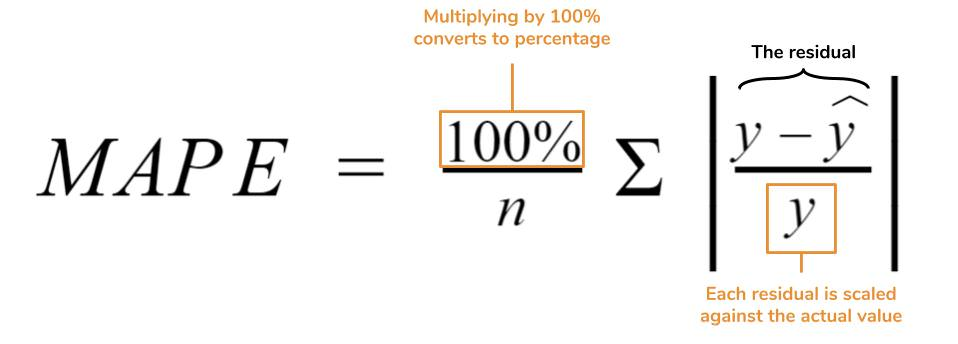
Just as MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average. MAPE has a clear interpretation since percentages are easier for people to conceptualize.

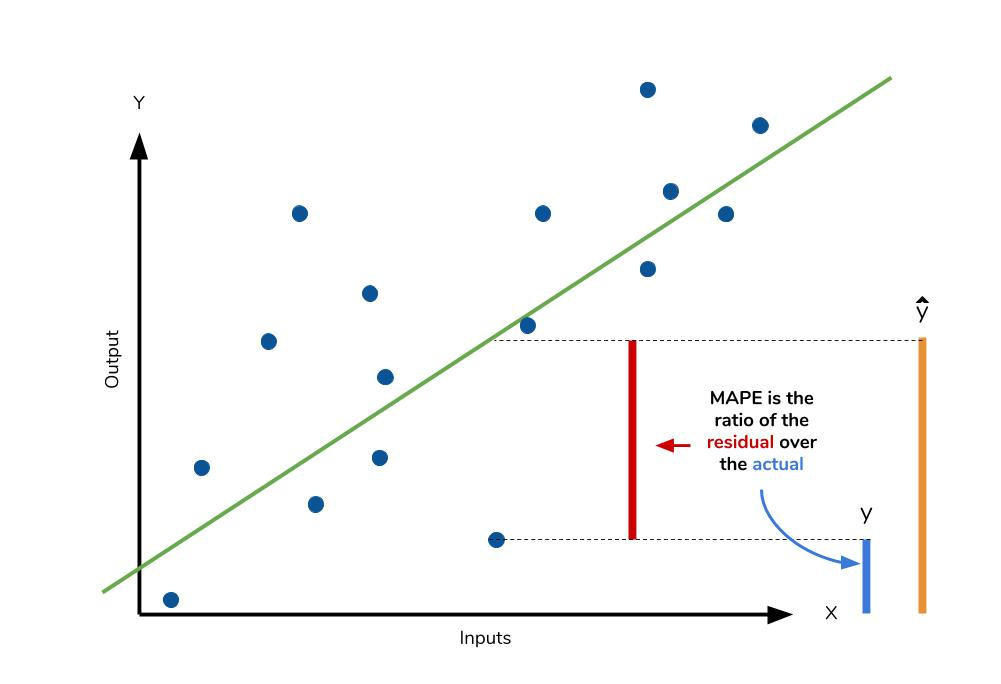

In [19]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.71 degrees.


In [20]:
# Determine Performance Metrics

In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [22]:
np.mean(mape)

5.94670162656855

### MAPE states that our model’s predictions are, on average, 6.1% off from actual value.

In [23]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.05 %.


In [24]:
# Visualizing a Single Decision Tree


In [25]:
# Install windows package from: 
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Install python graphviz package (pip install graphviz)
# Add ...\Graphviz2.38\bin to User path
# Add ...\Graphviz2.38\bin\dot.exe to System Path

In [26]:
import graphviz 
from sklearn.tree import export_graphviz

In [27]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

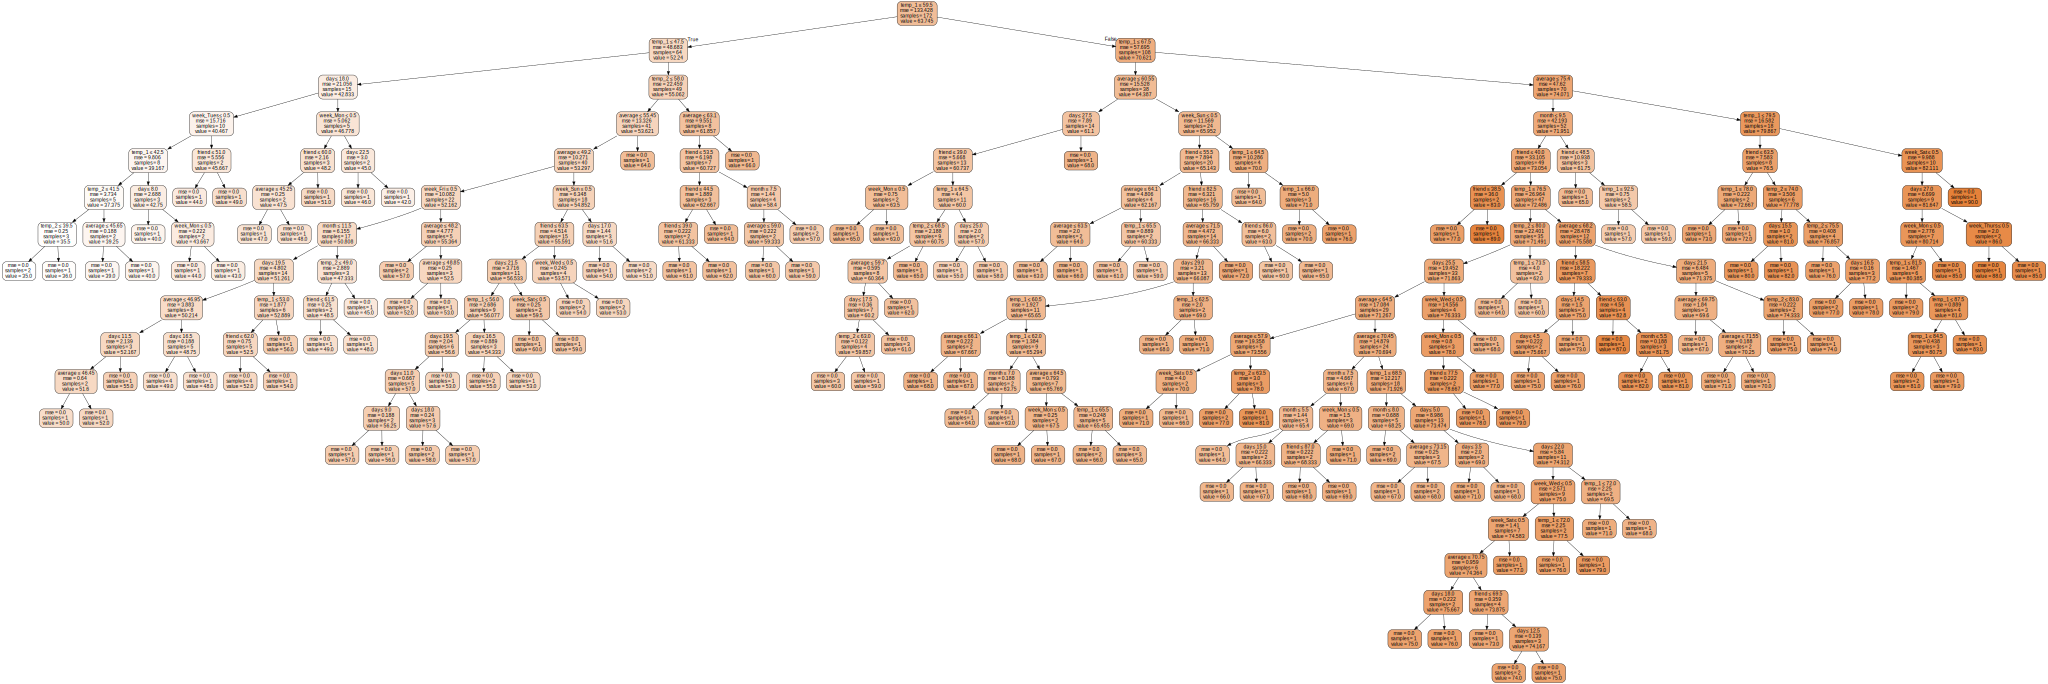

In [28]:
dot_data = export_graphviz(tree, 
                                out_file=None, 
                                feature_names=feature_list,  
                                #class_names=y.unique(),  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  

# graph.render("temps-tree") 
graph

In [29]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
importances

[0.0,
 0.01170840388076799,
 0.0203835997266504,
 0.02332229053778031,
 0.49197784426963936,
 0.40951987664663203,
 0.02291782308518205,
 0.002728346670486066,
 0.0051442010746687635,
 0.0022542759796243044,
 0.002480338417136062,
 0.0015193945163369806,
 0.0026220165049527515,
 0.0034215886901428046]

In [30]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances

[('year', 0.0),
 ('month', 0.01),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('temp_1', 0.49),
 ('average', 0.41),
 ('friend', 0.02),
 ('week_Fri', 0.0),
 ('week_Mon', 0.01),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [31]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('temp_1', 0.49),
 ('average', 0.41),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('friend', 0.02),
 ('month', 0.01),
 ('week_Mon', 0.01),
 ('year', 0.0),
 ('week_Fri', 0.0),
 ('week_Sat', 0.0),
 ('week_Sun', 0.0),
 ('week_Thurs', 0.0),
 ('week_Tues', 0.0),
 ('week_Wed', 0.0)]

In [32]:
# temp_1 - the max temperature of the day before. 
# This tells us the best predictor of the max temperature for a day is the max temperature of 
# the day before, a rather intuitive finding. 

# The second most important factor is the historical average max temperature, 
# also not that surprising. 

# Not so useful
#  - friend , 
#  - the day of the week, 
#  - the year, the month, 
#  - the temperature 2 days prior. 

# we can remove those variables that have no importance and the performance will not suffer. 
# Additionally, if we are using a different model, say a support vector machine, 
# we could use the random forest feature importances as a kind of "feature selection" method. 

# Let’s quickly make a random forest with only the two most important variables, 
# the max temperature 1 day prior and the historical average and see how the performance compares.

In [13]:
# Extract the two most important features

X = df_train[['temp_1', 'average']]

feature_list = X.columns

In [14]:
print(X.shape)
print(y.shape)
print(feature_list)

(348, 2)
(348,)
Index(['temp_1', 'average'], dtype='object')


In [15]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [16]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 2)
Training Labels Shape: (278,)
Testing Features Shape: (70, 2)
Testing Labels Shape: (70,)


In [17]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=42)

In [18]:
# Train the random forest
rf_most_important.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [19]:
# Make predictions and determine the error
predictions = rf_most_important.predict(X_test)

In [20]:
errors = abs(predictions - y_test)

In [21]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.83 degrees.
Accuracy: 93.89 %.


In [22]:
rf_most_important.score(X_train,y_train)

0.9712959709428689

In [23]:
rf_most_important.score(X_test,y_test)

0.7854938847182588

In [25]:
rf_most_important.score(X_test,predictions)

1.0

In [42]:
# we actually do not need all the data we collected to make accurate 
# predictions! If we were to continue using this model, we could only 
# collect the two variables and achieve nearly the same performance. 

# Knowing how to find the right balance between performance and cost is 
# an essential skill for a DS/ML engineer and will ultimately 
# depend on the problem!